In [1]:
#ensembling
from mlxtend.classifier import StackingCVClassifier
import numpy as np
import pandas as pd
import sys, os, glob
import imp
import seaborn as sns
sys.path.append('./src/')
import my_ensembler, feature_utils, defines, model_utils, my_bert
from sklearn.neighbors import KNeighborsClassifier
from sklearn_crfsuite import scorers, CRF
from sklearn.pipeline import Pipeline
import json
import common_utils
from transformers import BertModel, BertTokenizerFast
from sklearn_crfsuite.utils import flatten


### Load docs map

In [2]:
per_par=True
seq_len=3
step=3

In [7]:
dir_name = "scaled_maxabs"
doc_map_path =  os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"nan_max.abs_sacled_docs_map.json")
with open(doc_map_path, 'r') as fp:
    docs_map=json.load(fp)

In [15]:
docs_map=common_utils.convert_str_keys_to_int(docs_map)
docs_map.keys()

dict_keys([20, 35, 14, 1, 69, 56, 43, 62, 77, 48, 64, 71, 50, 45, 38, 12, 7, 26, 33, 19, 15, 21, 34, 49, 63, 76, 57, 42, 68, 51, 44, 65, 70, 18, 27, 32, 13, 6, 39, 75, 60, 41, 54, 3, 16, 29, 8, 37, 22, 31, 24, 5, 10, 47, 52, 78, 59, 73, 66, 40, 55, 74, 61, 36, 23, 9, 28, 80, 2, 17, 4, 11, 30, 25, 72, 67, 58, 79, 46, 53])

In [17]:
feature_utils.reshape_docs_map_to_seq(docs_map,per_par,seq_len,step)

[20] 90 -> 30 [35] 63 -> 21 [14] 129 -> 43 [1] 203 -> 68 [69] 517 -> 173 [56] 268 -> 90 [43] 99 -> 33 [62] 248 -> 83 [77] 176 -> 59 [48] 223 -> 75 [64] 347 -> 116 [71] 156 -> 52 [50] 184 -> 62 [45] 204 -> 68 [38] 90 -> 30 [12] 150 -> 50 [7] 248 -> 83 [26] 114 -> 38 [33] 91 -> 31 [19] 265 -> 89 [15] 121 -> 41 [21] 108 -> 36 [34] 49 -> 17 [49] 206 -> 69 [63] 338 -> 113 [76] 132 -> 44 [57] 271 -> 91 [42] 136 -> 46 [68] 439 -> 147 [51] 208 -> 70 [44] 199 -> 67 [65] 335 -> 112 [70] 183 -> 61 [18] 62 -> 21 [27] 67 -> 23 [32] 73 -> 25 [13] 90 -> 30 [6] 420 -> 140 [39] 111 -> 37 [75] 68 -> 23 [60] 245 -> 82 [41] 137 -> 46 [54] 243 -> 81 [3] 113 -> 38 [16] 102 -> 34 [29] 105 -> 35 [8] 82 -> 28 [37] 99 -> 33 [22] 89 -> 30 [31] 79 -> 27 [24] 158 -> 53 [5] 65 -> 22 [10] 123 -> 41 [47] 160 -> 54 [52] 275 -> 92 [78] 122 -> 41 [59] 370 -> 124 [73] 85 -> 29 [66] 366 -> 122 [40] 148 -> 50 [55] 249 -> 83 [74] 95 -> 32 [61] 433 -> 145 [36] 87 -> 29 [23] 74 -> 25 [9] 276 -> 92 [28] 167 -> 56 [80] 223 -> 7

## Try BERT Transformer

In [23]:
alephbert_tokenizer = BertTokenizerFast.from_pretrained('onlplab/alephbert-base')
# imp.reload(my_bert)
# bert_preprocess = my_bert.BertTransformer(tokenizer=alephbert_tokenizer)
# X_tensor_map = bert_preprocess.fit_transform(X=docs_map,indices=np.arange(1,71))

In [212]:
len(X_tensor_map['y']),sum(X_tensor_map['y'])

(31956, tensor(8974))

## Try BERT estmimator

In [24]:
imp.reload(my_bert)
alephbert_model = BertModel.from_pretrained('onlplab/alephbert-base', return_dict=False)
# bert_estimator = my_bert.BertClassifier(pretrained_model=alephbert_model)
# bert_estimator

Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [93]:
X_tensor_map.keys()

dict_keys(['seq', 'mask', 'y', 'y_list'])

In [101]:
np.unique(X_tensor_map['y'])

array([0, 1])

In [111]:
imp.reload(my_bert)
my_bert.get_cross_entropy(np.asarray(X_tensor_map['y']))

Class Weights: [0.69523975 1.78047693]


NLLLoss()

In [110]:
np.asarray(X_tensor_map['y'])

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
%%time
imp.reload(my_bert)
bert_estimator = my_bert.BertClassifier(pretrained_model=alephbert_model)
bert_estimator.fit(X=X_tensor_map)


>>>>>>>init() called.

>>>>>>> fit() called
Class Weights: [0.69523975 1.78047693]
CPU times: user 3h 16min 46s, sys: 1h 15min 5s, total: 4h 31min 52s
Wall time: 15min 31s


BertClassifier(pretrained_model=BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(52000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): B...
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
        )
        (output): BertOutput(
          (dense): Linear(in_features=3072, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (pooler): BertPooler(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
  )
))

In [129]:
bert_estimator

BertClassifier(pretrained_model=BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(52000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): B...
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
        )
        (output): BertOutput(
          (dense): Linear(in_features=3072, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (pooler): BertPooler(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
  )
))

In [125]:
X_tensor_map_train = bert_preprocess.fit_transform(X=docs_map,indices=np.arange(72,81))


>>>>>>>fit() called.


>>>>>>>transform() called.



In [138]:
X_tensor_map_train['y']

tensor([0, 0, 0,  ..., 0, 0, 0])

In [134]:
y_test = ['is_nar' if i==1 else 'not_nar' for i in list(X_tensor_map_train['y'])]


              precision    recall  f1-score   support

     not_nar       0.80      0.95      0.87      2772
      is_nar       0.69      0.30      0.42       969

    accuracy                           0.78      3741
   macro avg       0.74      0.63      0.64      3741
weighted avg       0.77      0.78      0.75      3741



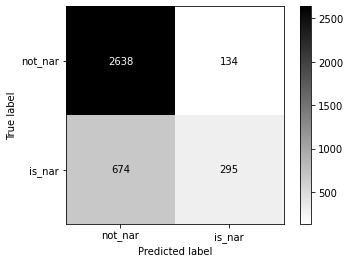

In [139]:
feature_utils.get_prediction_report(y_test,bert_pred,labels=['not_nar','is_nar'])

In [184]:
bert_proba = bert_estimator.predict_proba(X_tensor_map_train)
bert_proba

array([[0.7778702 , 0.22212978],
       [0.7609829 , 0.23901714],
       [0.7513149 , 0.24868506],
       ...,
       [0.76287687, 0.23712313],
       [0.7348781 , 0.26512188],
       [0.2802126 , 0.71978736]], dtype=float32)

## Try pipeline: transform -> fit

In [9]:
train_indices=np.arange(1,11)
test_indices=np.arange(12,16)

In [10]:
train_indices

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
X_train = common_utils.select_dic_keys(docs_map,train_indices)
X_test = common_utils.select_dic_keys(docs_map,test_indices)
y_train=common_utils.get_y_labels(docs_map,train_indices)
y_test=common_utils.get_y_labels(docs_map,test_indices)

In [473]:
imp.reload(model_utils)
imp.reload(common_utils)


crf_preprocess = model_utils.CrfTransformer(seq_len=3,step=3)

crf = CRF(
    **best_params_crf,
    max_iterations=100,
    all_possible_transitions=True,
)

crf_estimator=model_utils.CrfClassifier(crf_model=crf)
crf_pipe = Pipeline(steps=[('preprocessor',crf_preprocess), ('classifier', crf_estimator)]) 


>>>>>>>init() called.


>>>>>>>init() called.



In [474]:
type(X_train)

dict

In [475]:
X_train[1].keys()

dict_keys(['X', 'y', 'groups', 'X_bert', 'y_bert', 'X_3_3', 'y_3_3', 'groups_3_3'])

In [476]:
crf_pipe

Pipeline(steps=[('preprocessor', CrfTransformer()),
                ('classifier',
                 CrfClassifier(crf_model=CRF(algorithm='lbfgs',
                                             all_possible_transitions=True,
                                             c1=0.5052489623208797,
                                             c2=0.03723629092212718,
                                             linesearch='MoreThuente',
                                             max_iterations=100,
                                             min_freq=9)))])

In [477]:
crf_pipe.fit_transform(X=X_train,y=y_train)


>>>>>>>transform() called.



CrfClassifier(crf_model=CRF(algorithm='lbfgs', all_possible_transitions=True,
                            c1=0.5052489623208797, c2=0.03723629092212718,
                            linesearch='MoreThuente', max_iterations=100,
                            min_freq=9))

In [480]:
crf_proba=crf_pipe.predict_proba(X=X_test)


>>>>>>>transform() called.



In [481]:
crf_proba

array([[0.91155729, 0.08844271],
       [0.94704095, 0.05295905],
       [0.95368004, 0.04631996],
       ...,
       [0.99726994, 0.00273006],
       [0.99043378, 0.00956622],
       [0.86430078, 0.13569922]])

In [502]:
imp.reload(my_bert)
imp.reload(common_utils)
bert_preprocess = my_bert.BertTransformer(tokenizer=alephbert_tokenizer)
bert_estimator = my_bert.BertClassifier(pretrained_model=alephbert_model)
bert_pipe = Pipeline(steps=[('preprocessor',bert_preprocess), ('classifier', bert_estimator)]) 


>>>>>>>init() called.


>>>>>>>init() called.



In [503]:
bert_pipe.fit_transform(X=X_train,y=y_train)


>>>>>>>fit() called.


>>>>>>>transform() called.

>>>>>>> fit() called
Class Weights: [0.70645766 1.71090201]


BertClassifier(pretrained_model=BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(52000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): B...
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
        )
        (output): BertOutput(
          (dense): Linear(in_features=3072, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (pooler): BertPooler(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
  )
))

In [504]:
bert_proba=bert_pipe.predict_proba(X=X_test)


>>>>>>>transform() called.



In [505]:
bert_proba

array([[0.58403546, 0.41596457],
       [0.48069516, 0.5193048 ],
       [0.6089756 , 0.3910244 ],
       ...,
       [0.61370355, 0.38629642],
       [0.5848076 , 0.41519243],
       [0.56672853, 0.43327147]], dtype=float32)

In [611]:
imp.reload(model_utils)
my_split=model_utils.DocsMapFold()
my_split

In [612]:
for tr,ts in my_split.split(docs_map):
    print(len(tr),len(ts))
    print(list(tr)[:5],list(ts)[:5])

64 16
[1, 2, 3, 5, 6] [65, 4, 7, 72, 43]
64 16
[1, 4, 5, 6, 7] [64, 2, 3, 38, 70]
64 16
[1, 2, 3, 4, 5] [32, 35, 72, 8, 74]


In [456]:
crf = CRF(
    **best_params_crf,
    max_iterations=100,
    all_possible_transitions=True,
)

In [ ]:
crf_preprocess = model_utils.CrfTransformer(seq_len=3,step=3)
crf_estimator=model_utils.CrfClassifier(crf_model=crf.clone())
x_train_crf,y_train_crf=crf_preprocess.fit_transform(docs_map,{'indices':train_idx})
x_test_crf,y_test_crf=crf_preprocess.fit_transform(docs_map,{'indices':test_idx})
crf_estimator=

bert_preprocess = my_bert.BertTransformer(tokenizer=alephbert_tokenizer)
x_train_bert,y_train_bert=bert_preprocess.fit_transform(docs_map,{'indices':train_idx})
x_test_bert,y_test_bert=bert_preprocess.fit_transform(docs_map,{'indices':test_idx}
bert_estimator = my_bert.BertClassifier(pretrained_model=alephbert_model)
bert_estimator                                            

In [508]:
isinstance(y_train,np.ndarray)

False

In [537]:
len(X_train.keys()), len(X_test.keys())

(10, 4)

In [592]:
from sklearn.ensemble import VotingClassifier,StackingClassifier
%%time
imp.reload(model_utils)
imp.reload(common_utils)

# crf pipe
crf_preprocess = model_utils.CrfTransformer(seq_len=3,step=3)

crf = CRF(
    **best_params_crf,
    max_iterations=100,
    all_possible_transitions=True,
)

crf_estimator=model_utils.CrfClassifier(crf_model=crf)
crf_pipe = Pipeline(steps=[('preprocessor',crf_preprocess), ('classifier', crf_estimator)])
# bert pipe
bert_preprocess = my_bert.BertTransformer(tokenizer=alephbert_tokenizer)
bert_estimator = my_bert.BertClassifier(pretrained_model=alephbert_model)
bert_pipe = Pipeline(steps=[('preprocessor',bert_preprocess), ('classifier', bert_estimator)]) 

#voting
vote = model_utils.MyVotingClassifier(
estimators=[('crf_pipe',crf_pipe),('bert_pipe', bert_pipe)],
   voting='soft')
vote.fit(X_train, y_train)


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>transform() called.


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>fit() called.


>>>>>>>transform() called.



/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


>>>>>>> fit() called
Class Weights: [0.70645766 1.71090201]


MyVotingClassifier(estimators=[('crf_pipe',
                                Pipeline(steps=[('preprocessor',
                                                 CrfTransformer()),
                                                ('classifier',
                                                 CrfClassifier(crf_model=CRF(algorithm='lbfgs',
                                                                             all_possible_transitions=True,
                                                                             c1=0.5052489623208797,
                                                                             c2=0.03723629092212718,
                                                                             linesearch='MoreThuente',
                                                                             max_iterations=100,
                                                                             min_freq=9)))])),
                               ('bert_pipe',
                                Pipeline(steps=[('preprocessor',
                                                 BertTransformer(...
          (dense): Linear(in_features=768, out_features=3072, bias=True)
        )
        (output): BertOutput(
          (dense): Linear(in_features=3072, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (pooler): BertPooler(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
  )
)))]))],
                   voting='soft')

In [594]:
vote.predict_proba(X_test)


>>>>>>>transform() called.


>>>>>>>transform() called.



/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


array([[0.76063667, 0.23936328],
       [0.7032875 , 0.29671247],
       [0.77802077, 0.22197923],
       ...,
       [0.79033748, 0.20966253],
       [0.78208809, 0.2179119 ],
       [0.73401475, 0.26598522]])

In [595]:
imp.reload(model_utils)
voting_pred=stack.predict(X_test)


>>>>>>>transform() called.


>>>>>>>transform() called.



In [596]:
voting_pred

array(['is_nar', 'is_nar', 'is_nar', ..., 'is_nar', 'is_nar', 'is_nar'],
      dtype='<U7')


              precision    recall  f1-score   support

      is_nar       0.16      0.50      0.24       648
     not_nar       0.46      0.14      0.21      1994

    accuracy                           0.23      2642
   macro avg       0.31      0.32      0.23      2642
weighted avg       0.39      0.23      0.22      2642



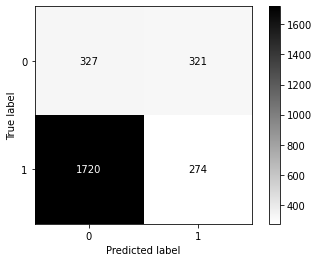

In [597]:
feature_utils.get_prediction_report(flatten(y_test),voting_pred,labels=vote.classes_)

In [590]:
len(y_test),len(flatten(y_test))

(164, 2642)

In [598]:
imp.reload(model_utils)
imp.reload(my_bert)
vote=vote.score(X_test,y_test)


>>>>>>>transform() called.


>>>>>>>transform() called.



/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [599]:
vote

0.2148920917440065

## Clean cross-validate

In [34]:
imp.reload(common_utils)
dir_name="scaled_maxabs"
seq_len=3
step=3
per_par=True
docs_map = common_utils.get_docs_map(
    dir_name=dir_name,
    docs_map_name="nan_max.abs_sacled_docs_map.json",
    per_par=per_par,
    seq_len=seq_len,
    step=step)
docs_map.keys()

[20] 90 -> 30 [35] 63 -> 21 [14] 129 -> 43 [1] 203 -> 68 [69] 517 -> 173 [56] 268 -> 90 [43] 99 -> 33 [62] 248 -> 83 [77] 176 -> 59 [48] 223 -> 75 [64] 347 -> 116 [71] 156 -> 52 [50] 184 -> 62 [45] 204 -> 68 [38] 90 -> 30 [12] 150 -> 50 [7] 248 -> 83 [26] 114 -> 38 [33] 91 -> 31 [19] 265 -> 89 [15] 121 -> 41 [21] 108 -> 36 [34] 49 -> 17 [49] 206 -> 69 [63] 338 -> 113 [76] 132 -> 44 [57] 271 -> 91 [42] 136 -> 46 [68] 439 -> 147 [51] 208 -> 70 [44] 199 -> 67 [65] 335 -> 112 [70] 183 -> 61 [18] 62 -> 21 [27] 67 -> 23 [32] 73 -> 25 [13] 90 -> 30 [6] 420 -> 140 [39] 111 -> 37 [75] 68 -> 23 [60] 245 -> 82 [41] 137 -> 46 [54] 243 -> 81 [3] 113 -> 38 [16] 102 -> 34 [29] 105 -> 35 [8] 82 -> 28 [37] 99 -> 33 [22] 89 -> 30 [31] 79 -> 27 [24] 158 -> 53 [5] 65 -> 22 [10] 123 -> 41 [47] 160 -> 54 [52] 275 -> 92 [78] 122 -> 41 [59] 370 -> 124 [73] 85 -> 29 [66] 366 -> 122 [40] 148 -> 50 [55] 249 -> 83 [74] 95 -> 32 [61] 433 -> 145 [36] 87 -> 29 [23] 74 -> 25 [9] 276 -> 92 [28] 167 -> 56 [80] 223 -> 7

dict_keys([20, 35, 14, 1, 69, 56, 43, 62, 77, 48, 64, 71, 50, 45, 38, 12, 7, 26, 33, 19, 15, 21, 34, 49, 63, 76, 57, 42, 68, 51, 44, 65, 70, 18, 27, 32, 13, 6, 39, 75, 60, 41, 54, 3, 16, 29, 8, 37, 22, 31, 24, 5, 10, 47, 52, 78, 59, 73, 66, 40, 55, 74, 61, 36, 23, 9, 28, 80, 2, 17, 4, 11, 30, 25, 72, 67, 58, 79, 46, 53])

In [37]:
train_indices=np.arange(1,5)
test_indices=np.arange(6,8)
X_train = common_utils.select_dic_keys(docs_map,train_indices)
X_test = common_utils.select_dic_keys(docs_map,test_indices)
y_train=common_utils.get_y_labels(docs_map,train_indices)
y_test=common_utils.get_y_labels(docs_map,test_indices)

In [39]:
%%time
imp.reload(model_utils)
imp.reload(common_utils)
imp.reload(my_bert)

# crf pipe
crf_preprocess = model_utils.CrfTransformer(seq_len=3,step=3)

crf = CRF(
    **best_params_crf,
    max_iterations=100,
    all_possible_transitions=True,
)

crf_estimator=model_utils.CrfClassifier(crf_model=crf)
crf_pipe = Pipeline(steps=[('preprocessor',crf_preprocess), ('classifier', crf_estimator)])
# bert pipe
bert_preprocess = my_bert.BertTransformer(tokenizer=alephbert_tokenizer)
bert_estimator = my_bert.BertClassifier(pretrained_model=alephbert_model,batch_size=128)
bert_pipe = Pipeline(steps=[('preprocessor',bert_preprocess), ('classifier', bert_estimator)]) 

#voting
vote = model_utils.MyVotingClassifier(
estimators=[('crf_pipe',crf_pipe),('bert_pipe', bert_pipe)],
    voting='soft',
    n_jobs=-1)

my_cv=model_utils.DocsMapFold()

model_utils.my_cross_validate(
    estimator=vote,
    docs_map=X_train,
    cv=my_cv,
    n_jobs=-1,
    pre_dispatch = 4
    )

CrfTransformer>>>>>>>init() called
CrfClassifier>>>>>>init() called
BertTransformer>>>>>>>init() called
BertClassifier>>>>>>> init() called
CrfTransformer>>>>>>>init() called
CrfClassifier>>>>>>init() called
BertTransformer>>>>>>>init() called
BertClassifier>>>>>>> init() called
CrfTransformer>>>>>>>init() called
CrfClassifier>>>>>>init() called
BertTransformer>>>>>>>init() called
BertClassifier>>>>>>> init() called
CrfTransformer>>>>>>>init() called
CrfClassifier>>>>>>init() called
BertTransformer>>>>>>>init() called
BertClassifier>>>>>>> init() called


IndexError: list index out of range

In [21]:
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,"recalc_tfidf","best_params_lemma.word_docFoldCv_2.json")

with open(json_path, 'r') as fp:
    best_params_crf = json.load(fp)
best_params_crf

{'algorithm': 'lbfgs',
 'c1': 0.5052489623208797,
 'c2': 0.03723629092212718,
 'linesearch': 'MoreThuente',
 'min_freq': 9}

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    [
    ('crf', 
      crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
    )),
#      ('alephbert',
#       #loadmodel
#      ),
#         ('hebert',
#         #loadmodel
#         )
    ('knn', KNeighborsClassifier())
    ],
    voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_
tree.score(X_test, y_test), lr.score(X_test, y_test), voting.score(X_test, y_test)